In [1]:
from dolfin import *
from dolfin_adjoint import *

import moola 
import time
%load_ext autoreload
%autoreload 2

In [14]:
n = 32
mesh = UnitSquareMesh(n, n)

# cf = MeshFunction("bool", mesh, mesh.geometric_dimension())
# subdomain = CompiledSubDomain('std::abs(x[0]-0.5) < 0.25 && std::abs(x[1]-0.5) < 0.25')
# subdomain.mark(cf, True)
# mesh = refine(mesh, cf)



V = FunctionSpace(mesh, "CG", 1)
W = FunctionSpace(mesh, "DG", 0)

f = interpolate(Expression("x[0]+x[1]", name='Control', degree=1), W)
u = Function(V, name='State')
v = TestFunction(V)

F = (inner(grad(u), grad(v)) - f * v) * dx
bc = DirichletBC(V, 0.0, "on_boundary")
solve(F == 0, u, bc)


x = SpatialCoordinate(mesh)
w = Expression("sin(pi*x[0])*sin(pi*x[1])", degree=3)
d = 1 / (2 * pi ** 2)
d = Expression("d*w", d=d, w=w, degree=3)

alpha = Constant(1e-6)
J = assemble((0.5 * inner(u - d, u - d)) * dx + alpha / 2 * f ** 2 * dx)
control = Control(f)


rf = ReducedFunctional(J, control)


problem = MoolaOptimizationProblem(rf)
f_moola = moola.DolfinPrimalVector(f)
solver = moola.twoBone(problem, f_moola, options={'gtol': 1e-9,
                                                   'maxiter': 20,
                                                   'display': 3,
                                                   })

start_time = time.time()

sol = solver.solve()
print(time.time() - start_time)

f_opt = sol['control'].data

plot(f_opt, title="f_opt")




tBone method.
------------------------------
Line search:		 strong_wolfe
Maximum iterations:	 20

iteration = 0:	objective = 0.00014814505121451188:	grad_norm = 0.0008000647612949475:
-g -1.22021266291715e-05


RuntimeError: Error: initial g >= 0 (1.220213e-05)

Newton CG method.
------------------------------
Line search:		 strong_wolfe
Maximum iterations:	 20

iteration = 0:	objective = 0.00014814505121451188:	grad_norm = 0.0008000647612949475:
TEST: 6.401036222659414e-07 5.121243517522316e-10
cg_iter = 0	curve = 1.6008400096621582e-09	hesstol = 0
TEST: 1.1241445297899176e-08 5.121243517522316e-10
cg_iter = 1	curve = 4.181010438290557e-12	hesstol = 0
TEST: 9.049225200233358e-10 5.121243517522316e-10
cg_iter = 2	curve = 9.697381710354821e-14	hesstol = 0
-g 0.0002946176936032259
iteration = 1:	objective = 8.362044129007599e-07:	grad_norm = 5.233295129907182e-06:	delta_J = 0.0001473088468016111:
TEST: 2.7387377916710235e-11 1.4332623147244718e-16
cg_iter = 0	curve = 9.348727039209523e-16	hesstol = 0
TEST: 1.493422728675903e-11 1.4332623147244718e-16
cg_iter = 1	curve = 1.185789960948492e-15	hesstol = 0
TEST: 2.0622644084051787e-11 1.4332623147244718e-16
cg_iter = 2	curve = 5.310795660527765e-15	hesstol = 0
TEST: 2.983171606046601e-11 1.43326231

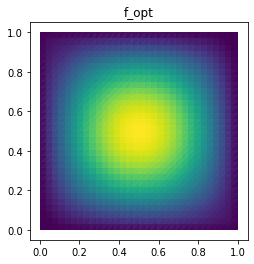

In [10]:


n = 32
mesh = UnitSquareMesh(n, n)

# cf = MeshFunction("bool", mesh, mesh.geometric_dimension())
# subdomain = CompiledSubDomain('std::abs(x[0]-0.5) < 0.25 && std::abs(x[1]-0.5) < 0.25')
# subdomain.mark(cf, True)
# mesh = refine(mesh, cf)



V = FunctionSpace(mesh, "CG", 1)
W = FunctionSpace(mesh, "DG", 0)

f = interpolate(Expression("x[0]+x[1]", name='Control', degree=1), W)
u = Function(V, name='State')
v = TestFunction(V)

F = (inner(grad(u), grad(v)) - f * v) * dx
bc = DirichletBC(V, 0.0, "on_boundary")
solve(F == 0, u, bc)


x = SpatialCoordinate(mesh)
w = Expression("sin(pi*x[0])*sin(pi*x[1])", degree=3)
d = 1 / (2 * pi ** 2)
d = Expression("d*w", d=d, w=w, degree=3)

alpha = Constant(1e-6)
J = assemble((0.5 * inner(u - d, u - d)) * dx + alpha / 2 * f ** 2 * dx)
control = Control(f)


rf = ReducedFunctional(J, control)


problem = MoolaOptimizationProblem(rf)
f_moola = moola.DolfinPrimalVector(f)
solver = moola.NewtonCG(problem, f_moola, options={'gtol': 1e-9,
                                                   'maxiter': 20,
                                                   'display': 3,
                                                   'ncg_hesstol': 0})


start_time = time.time()

sol = solver.solve()

print(time.time() - start_time)
f_opt = sol['control'].data

plot(f_opt, title="f_opt")

# # Define the expressions of the analytical solution
# f_analytic = Expression("1/(1+alpha*4*pow(pi, 4))*w", w=w, alpha=alpha, degree=3)
# u_analytic = Expression("1/(2*pow(pi, 2))*f", f=f_analytic, degree=3)

# # We can then compute the errors between numerical and analytical
# # solutions.

# f.assign(f_opt)
# solve(F == 0, u, bc)
# control_error = errornorm(f_analytic, f_opt)
# state_error = errornorm(u_analytic, u)
# print("h(min):           %e." % mesh.hmin())
# print("Error in state:   %e." % state_error)
# print("Error in control: %e." % control_error)

